In [29]:
pip install seaborn

   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.6 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.6 kB 491.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.6 kB 726.2 kB/s eta 0:00:01
   ------------------------- ------------ 194.6/294.6 kB 903.5 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.6 kB 888.4 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 1.0 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 1.0 MB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.6 kB 1.0 MB/s eta 0:00:01
   ------------------------------------ - 286.7/294.6 kB 631.2 kB/s eta 0:00:01
   -------------------------------------- 294.6/294.6 kB 626.3 kB/

# TASK1: IRIS FLOWER CLASSIFICATION

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

## Importing necessary libraries


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler  # Add this import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## loading the iris dataset

In [43]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Dropping unwanted columns 

In [44]:
# droping the id column because we need only 4 attriute to classify(ie.1.SepalLengthCm 2.SepalWidthCm 3.PetalLengthCm 4.PetalWidthCm )
# so Remove the "Id" column from the DataFrame
df = df.drop(["Id"], axis=1)


In [45]:
df


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Analysing the dataset

In [46]:
# Displaying basic information about the dataset
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [47]:
# Displaying the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())


First Few Rows:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [48]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [49]:
# Display summary statistics of numerical columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
print(iris_df['Species'].value_counts())


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [51]:
import seaborn as sns


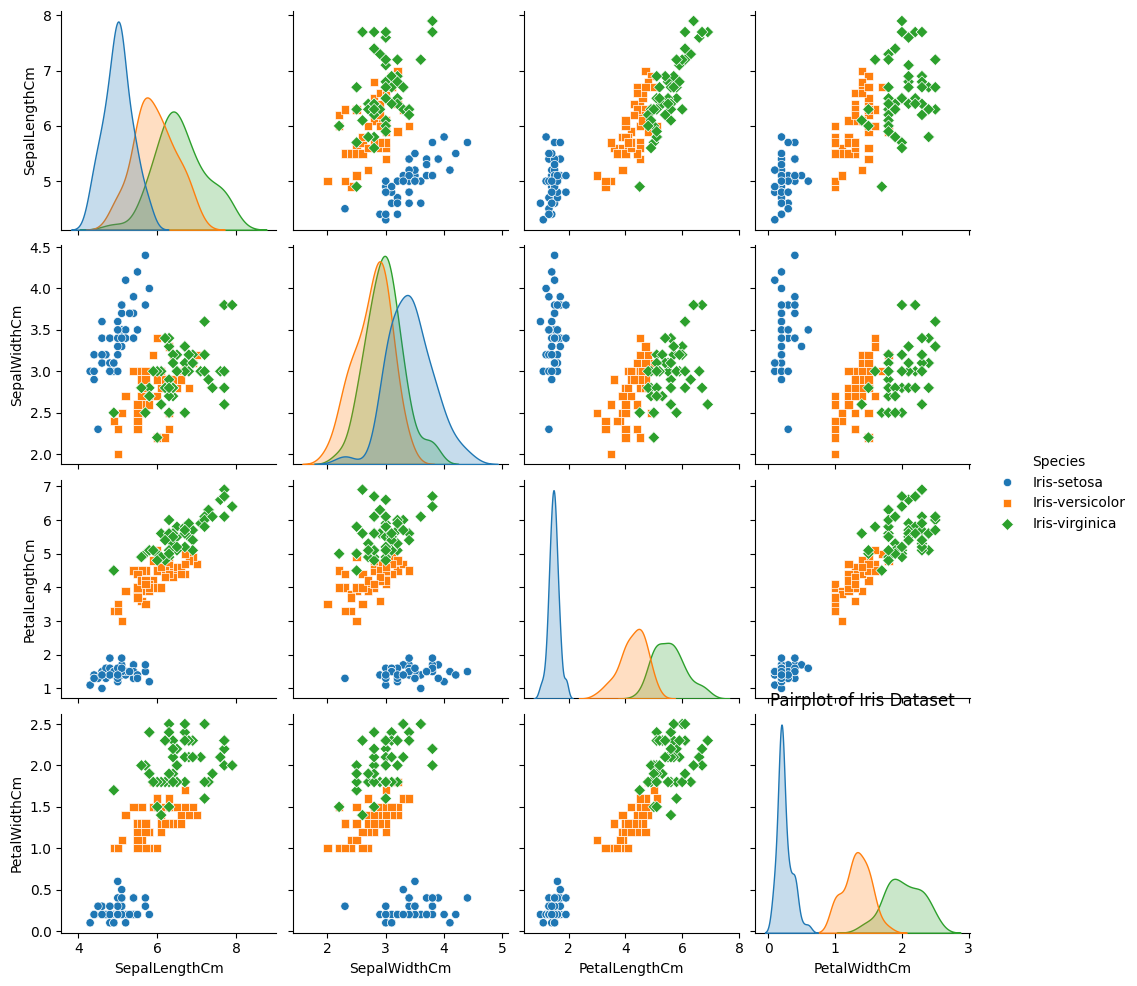

In [52]:
sns.pairplot(df, hue='Species', markers=['o', 's', 'D'])
plt.title("Pairplot of Iris Dataset")
plt.show()

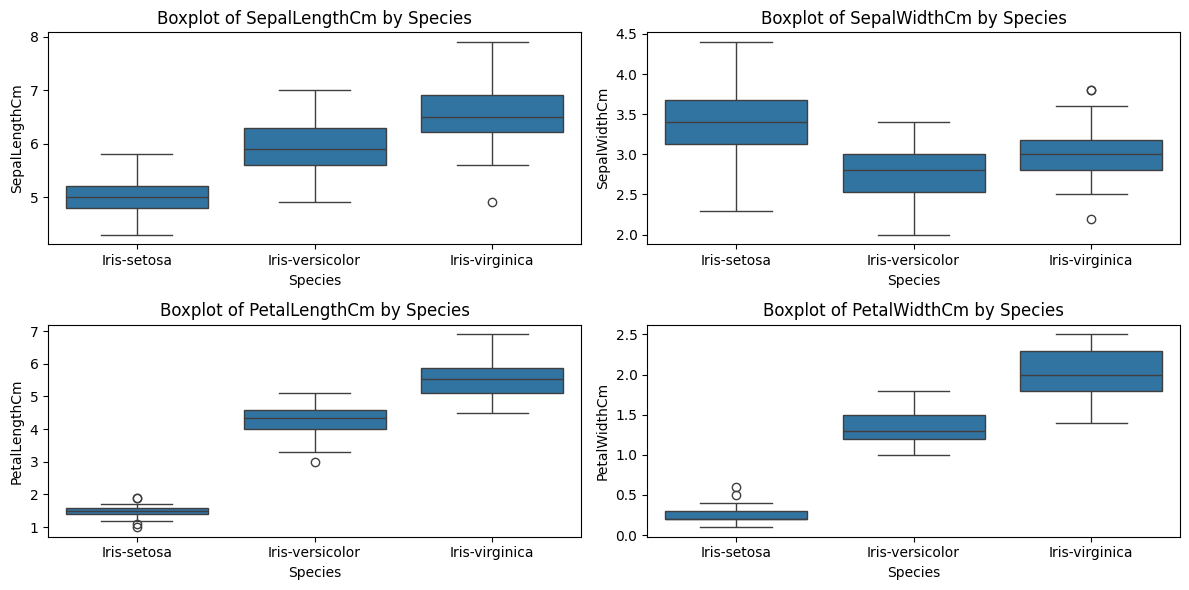

In [53]:
# Boxplot for each feature based on the target variable
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Species', y=column, data=df)
    plt.title(f'Boxplot of {column} by Species')
plt.tight_layout()
plt.show()

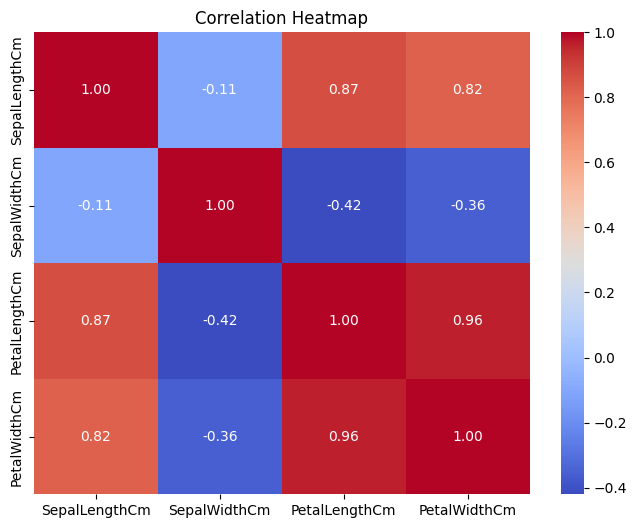

In [54]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [55]:
# Separate features (X) and target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']


In [56]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [57]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [58]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



standardization ensures that each feature has a mean of 0 and a standard deviation of 1. This process is particularly important for algorithms that are sensitive to the scale of the features, such as Support Vector Machines or k-Nearest Neighbors. It helps improve the convergence of optimization algorithms and ensures that each feature contributes equally to the model's performance.

In [61]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training (using Decision Tree Classifier )

In [62]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

##  Model Evaluation


In [63]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [64]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [65]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        36
Iris-versicolor       0.89      0.98      0.93        43
 Iris-virginica       0.97      0.88      0.92        41

       accuracy                           0.95       120
      macro avg       0.96      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120



## Visualizing the Decision Tree

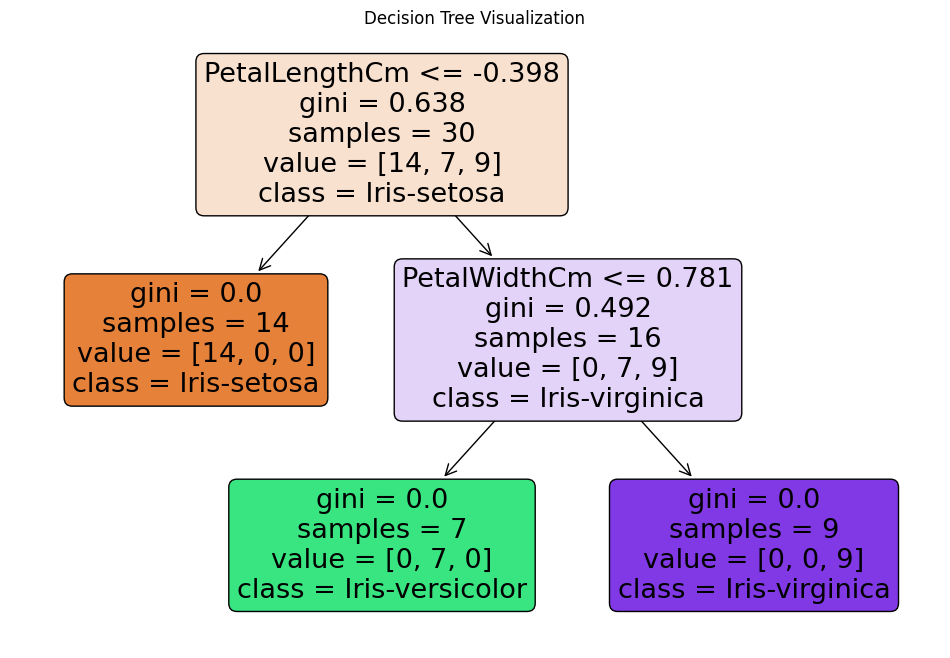

In [68]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=df['Species'].unique(), filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## Conclusion and Documentation


### Summary



In this project, we successfully developed a `machine learning model for Iris flower classification`. The key steps and findings are summarized below:



### 1. Data Exploration:



Explored the `Iris dataset`, visualizing relationships between variables, and gaining insights into the distribution of different species.


### 2.Data Preprocessing:



Cleaned the dataset by `dropping unnecessary columns`, handling missing values, and ensuring proper data types.
Split the data into training and testing sets.
Standardized the features to bring them to a common scale.

### 3.Visualization:



Utilized visualizations such as `pairplots`, `boxplots`, and `correlation heatmaps` to understand the relationships between features and the distribution of classes.


### 4.Model Training:



hose a Decision Tree Classifier for the initial model.
Trained the model on the training set.

### 5.Model Evaluation:



Achieved an accuracy of `95% on the test set`.
Evaluated the model using metrics such as accuracy and a classification report.

## Key Findings:


1.The pairplot and boxplots provided valuable insights into the distribution of features across different species, aiding in the selection of a machine learning model.

2.The Decision Tree Classifier demonstrated strong performance in classifying Iris flowers based on the provided features.

3.The model achieved a high accuracy of 95% on the test set, indicating its effectiveness in predicting the species of Iris flowers.

